In [8]:
import math
import random
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['font.sans-serif']=['SimHei'] 
plt.rcParams['axes.unicode_minus'] = False 
random.seed(322)

## 1. 全局变量
- count：采样次数
- noon_span：中午时间跨度
- Tag[0:3]:分别代表电动出租车, 电动公交车, 电动私家车, 电动公务用车


In [9]:
count=10000
noon_span=[11,14.5]
Tag="出租车", "公交车", "私家车", "公务用车"

## 2. 逆变换采样函数

In [10]:
def Inverse_Transform_Sampling(L):
    x = random.uniform(0, 1)
    i, j = 0, len(L) - 1
    if x > 1:
        return 0
    while i < j:
        mid = (i + j) // 2
        if x <L[mid]:
            j = mid
        else:
            i = mid + 1
        if x == L[mid]:
            return mid
    return j

## 3. 车辆类型的概率模型及蒙特卡洛模拟
  - proportion[0:3]:分别为：taxi,bus,private_car,public_car的占有率
  - CDF_type为车辆类型的概率分布函数

In [11]:
proportion=np.array([15.52,65.52,11.24,7.72])/100
CDF_type=np.zeros(shape=(4))
CDF_type[0]=proportion[0]
for  i in range(1,4):
    CDF_type[i]=CDF_type[i-1]+proportion[i]
    
CDF_type,sum(proportion)

(array([0.1552, 0.8104, 0.9228, 1.    ]), 1.0)

### 3.1车辆类型的概率分布函数的图像：

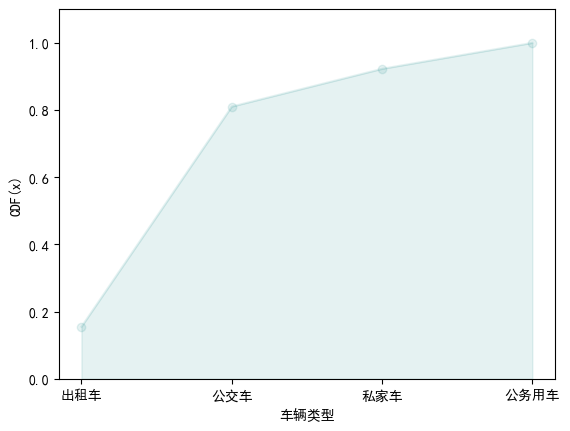

In [12]:
# 车辆类型和对应比例
probabilities = proportion

# 计算CDF
CDF = np.cumsum(probabilities)

fig, ax = plt.subplots()
ax.plot(Tag, CDF, '-o', alpha=0.1, color='#008080')
ax.fill_between(Tag, CDF, alpha=0.1, color='#008080')
ax.set_ylim([0, 1.1])
ax.set_ylabel('CDF(x)')
ax.set_xlabel('车辆类型')
plt.show()

### 3.2车辆类型的蒙特卡洛模拟：


- type_list[0:3]分别代表Taxi，Bus，Private Car，Public Car采样所得到的电车序号

In [13]:
type_list=[[],[],[],[]]
type_total=np.zeros(shape=count)

for i in range(0,count):
    car_type=Inverse_Transform_Sampling(CDF_type)
    type_list[car_type].append(i)

for i in range(4):
    for j,val in enumerate(type_list[i]):
        type_total[val]=i


type_list[0][0:10],len(type_list[1]),type_total[0:10],type_list[1][0:10]
    

([3, 31, 35, 44, 49, 52, 54, 58, 59, 80],
 6550,
 array([2., 2., 1., 0., 1., 3., 1., 1., 1., 1.]),
 [2, 4, 6, 7, 8, 9, 10, 11, 12, 14])

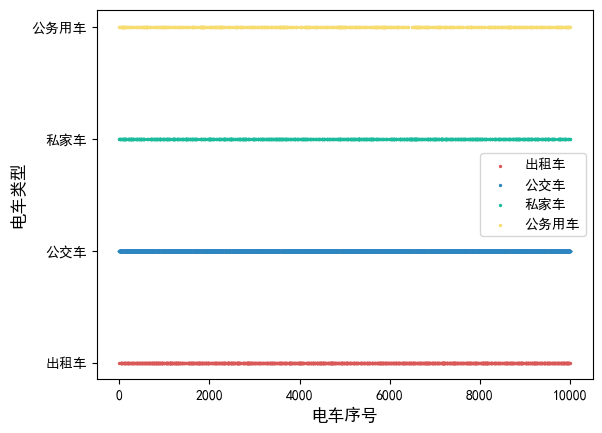

In [14]:
fig, ax = plt.subplots()
colors = ['#DB5858', '#2E86C1', '#1ABC9C', '#F7DC6F']  # 每种类型的颜色

for i, tag in enumerate(Tag):
    ax.scatter(type_list[i], np.full(len(type_list[i]), i), s=2, marker='o', color=colors[i], label=tag)

ax.set_xlabel('电车序号', fontsize=12)
ax.set_ylabel('电车类型', fontsize=12)
ax.set_yticks(range(len(Tag)))
ax.set_yticklabels(Tag)
plt.legend(prop={'size': 10})
plt.show()